### 7CCSMCMP (Computer Programming)
# Coursework 2 
# DUE ON KEATs BY SUNDAY 27th November 23:55

This is the second programming assigment for this module.  

- It is worth 5% of your final grade.  
- Do your work for this assignment in the cells of this jupyter notebook.  You should be able to fit the code required for this assignment in this notebook.
- This notebook comes with a ```data/``` directory that holds the assignment data for this exercise.
- You must do ***your own work***, there is no ***collaborating*** allowed.
- Make sure that you properly ```comment``` your code, so that the grader can understand what your program is doing.  ***Uncommented code will result in loss of marks!***

## Your Details
Edit this Markdown cell with:



## Part 1 [55 points in total]

In this exercise, you will be exploring flight delay data in the United States as provided by [US Department of Transportation](http://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236&DB_Short_Name=On-Time).  

In the data/ directory you will find the .csv file for September 2015 (```ontime_flights_sept2015.csv```). 

Name | Description
--- | ---
YEAR | 2015
MONTH | 9
DAY_OF_MONTH | 1-30
DAY_OF_WEEK	| 1 (Monday) - 7 (Sunday)
UNIQUE_CARRIER | unique carrier code (see carriers.csv for look-up table)
TAIL_NUM | plane tail number
FL_NUM | flight number
ORIGIN |origin IATA airport code (see airports.csv for look-up table)
DEST | destination IATA airport code
CRS_DEP_TIME | scheduled departure time (local, hhmm)
DEP_TIME | actual departure time (local, hhmm)
CRS_ARR_TIME | scheduled arrival time (local, hhmm)
ARR_TIME | actual arrival time (local, hhmm)
ARR_DELAY | arrival delay, in minutes
CANCELLED | was the flight cancelled?
CANCELLATION_CODE |reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
DIVERTED | 1 = yes, 0 = no
CRS_ELAPSED_TIME | in minutes
ACTUAL_ELAPSED_TIME	| in minutes
AIR_TIME | in minutes
DISTANCE | in miles
CARRIER_DELAY | in minutes
WEATHER_DELAY | in minutes
NAS_DELAY | in minutes
SECURITY_DELAY | in minutes
LATE_AIRCRAFT_DELAY | in minutes

Answer each of the questions below, and include a short explanation for each answer or plot that you generate (use a Markdown cell to write your explanation).

To get you started, the dataset is loaded into a Pandas DataFrame, and the columns are listed for you. (*Note*: ignore the last columns "Unnamed: 26", this is due to a dangling comma on every line")

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from IPython.display import *
from ipywidgets import *
from collections import *
import csv
flights = pd.read_csv("data/ontime_flights_sept2015_full.csv")
print (flights.columns)




Index(['YEAR', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'UNIQUE_CARRIER',
       'TAIL_NUM', 'FL_NUM', 'ORIGIN', 'DEST', 'CRS_DEP_TIME', 'DEP_TIME',
       'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'CANCELLED',
       'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY',
       'Unnamed: 26'],
      dtype='object')


**Question 1.1 [5 points]** How many flights where recorded in the month of September?

In [5]:
# the whole data frame is build up from flights in september so we only have to 
# either get the height of the month column or  take the height from the shape of the dataframe 
# like this: flights.shape
print ("There were %d flights in September" % len(flights['MONTH']))



There were 464946 flights in September


**Question 1.2 [10 points]** In which direction do flights between JFK (New York City) and LAX (Los Angelos) take less time, JFK->LAX or LAX->JFK?  (Explain your calculations)

**Question 1.3 [5 points]** On average, what is the difference in minutes between the two directions?

In [6]:
#To evalute the difference in minutes between the two directions, we can use the actual flight time
# by using the AIR_TIME variable
jfk_lax_avrg = flights.AIR_TIME[(flights.ORIGIN == 'JFK') & (flights.DEST == "LAX")].mean()
lax_jfk_avrg = flights.AIR_TIME[(flights.ORIGIN == 'LAX') & (flights.DEST == "JFK")].mean()

print (" jfk_lax_avrg: %.2f, lax_jfk_avrg: %.2f" % (jfk_lax_avrg,lax_jfk_avrg))
print ("-"*60)
print (" in average, flights from  %s takes less time " % ("JFK->LAX" if(jfk_lax_avrg < lax_jfk_avrg) else "LAX->JFK"))
print ("-"*60)
print (" time  difference between the  two directions: %.2f mins." % (abs(jfk_lax_avrg-lax_jfk_avrg)))

 jfk_lax_avrg: 319.14, lax_jfk_avrg: 294.98
------------------------------------------------------------
 in average, flights from  LAX->JFK takes less time 
------------------------------------------------------------
 time  difference between the  two directions: 24.16 mins.


**Question 1.4 [10 points]** 

Plot the daily total weather delay for September.


**Question 1.5 [5 points]** 

Based on your plot, which day in Sept. had the most weather delay?

Sept 25, had the most weather delay. 


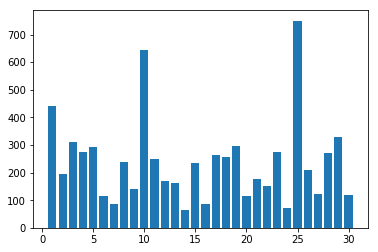

As can be seen,the day with peak WEATHER_DELAY was on Sept 25th


In [7]:

# for this we can take two approaches:

# Approach 1: we can look for the Max value in the WEATHER_DELAY variable, then look 
#for the related day of month, like this.
print ("Sept %d, had the most weather delay. " % flights.DAY_OF_MONTH[flights.WEATHER_DELAY == flights.WEATHER_DELAY.max()])

#Apporach 2: we can obtain the max WEATHER_DELAY per day and then graph it, so we can eyeball the peak day

top_delay_per_day = [flights.WEATHER_DELAY[flights.DAY_OF_MONTH == x].max() for x in np.sort(flights.DAY_OF_MONTH.unique())]
plt.bar(np.sort(flights.DAY_OF_MONTH.unique()),top_delay_per_day)
plt.show()
print ("As can be seen,the day with peak WEATHER_DELAY was on Sept 25th")



**Question 1.6 [10 points]** 

On a bar chart plot the airline carriers (UNIQUE_CARRIER's) by their average arrival delays, ordered from worse delay to the least.  *Ignore flights that arrive early (i.e. their ARR_DELAY is less than 0).*

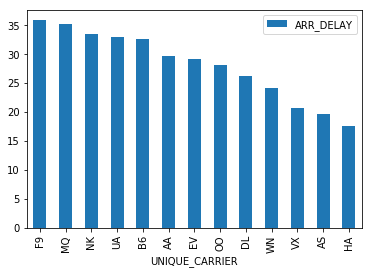

In [8]:
# just to easily visualize the two column we are going to work on
carrier_delays = flights[['UNIQUE_CARRIER','ARR_DELAY']]
# we group the  rows by UNIQUE_CARRIER, and apply the mean to each group
carrier_delays = carrier_delays[(carrier_delays.ARR_DELAY > 0)].groupby("UNIQUE_CARRIER").mean()
#To the resulting dataframe we sort it by ARR_DELAY, in descending direction and plot it using plotbar() 
carrier_delays.sort_values(by='ARR_DELAY', ascending=False).plot.bar()



**Question 1.7 [10 points]** 

Create a histogram showing the arrival delays for Chicago (airport code 'ORD').

- Include both early and late flights, ARR_DELAY will be positive and negative.
- Set the domain for the histogram to show flights that are up to one hour early to flights that are 2 hours late.
- Set the bin size for the flights to be 5 mins.

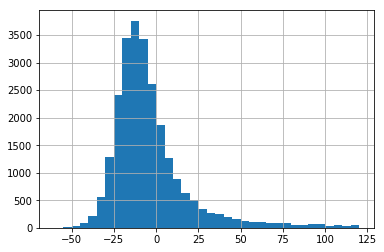

In [9]:
# from the column ARR_DELAY, we obtain only those with ORD destination
# on that result we apply the hist() function with the required characteristics
# the bin size is calculated by (120-(-60))/5 = 36, giving a bar each 5 minutes
display(flights.ARR_DELAY[flights.DEST == "ORD"].hist(bins=36,range=[-60,120]))



## Part 2 [20 points in total]

This flight delay data can be used to estimate the arrival delay given a route and a day of the week, and we will leverage this data to create a booking recomender function. In this part the aim is to create a python function that will help when booking a flight by alerting if the selected route and day of the week is one that has had delays in the past.

This will use the same dataframe used in Part 1 as a starting point, but will focus on the following columns: ORIGIN, DEST, DAY_OF_WEEK. In order to calculate delays use the ARR_DELAY column.

Step 1: Calculate for each combination of origin airport code (ORIGIN), destination airport code (DEST) and day of the week (DAY_OF_WEEK) the median value of ARR_DELAY.

Step 2: Use the results calculated to write a python function. This function should accept three arguments: origin, destination and dayofweek. The function should use these to evaluate whether the median arr_delay for the selected combination of the arguments is greater than 0. 
- If this is the case then it should return a recomandation not to fly. 
- If the median arr_delay for the selected combination is less than or equal to 0 then the recomandation returned should be to go ahead and book the flight.

Step 1: Calculate for Calculate for each combination of origin airport code (ORIGIN), destination airport code (DEST) and day of the week (DAY_OF_WEEK) the median value of ARR_DELAY.

In [10]:
#origin var
ORGN = "SFO"
#destination var
DSTNTN="JFK"
#day of week var
DOW = 4
#calculate a new dataframe containing the ARR_DELAY median from the grouped flights by ORIGIN,DEST,DAY_OF_WEEK
flights_grouped = pd.DataFrame({'ARR_DELAY' : flights.groupby(["ORIGIN","DEST","DAY_OF_WEEK"])["ARR_DELAY"].median()}).reset_index()
# to test I will retrieve the median ARR_DELAY where the ORIGIN = SFO,DEST=JFK and DAY_OF_WEEK= 4 
median = flights_grouped.ARR_DELAY[(flights_grouped.ORIGIN == ORGN) & (flights_grouped.DEST == DSTNTN) & (flights_grouped.DAY_OF_WEEK == DOW)].item()
print ("based on the calculated results,for a flight with\nORIGIN = 'SFO', DEST='JFK' and DAY_OF_WEEK= 4, the median ARR_DELAY is %s" % median)
# printing the ARR_DELAY median dataframe
print ("\n\nBellow is the whole meadian ARR_DELAY dataframe:")
display(flights_grouped)



based on the calculated results,for a flight with
ORIGIN = 'SFO', DEST='JFK' and DAY_OF_WEEK= 4, the median ARR_DELAY is -6.0


Bellow is the whole meadian ARR_DELAY dataframe:


,ORIGIN,DEST,DAY_OF_WEEK,ARR_DELAY
0,ABE,ATL,1,-7.0
1,ABE,ATL,2,-3.0
2,ABE,ATL,3,-9.0
3,ABE,ATL,4,-12.5
4,ABE,ATL,5,-10.0
5,ABE,ATL,6,-11.0
6,ABE,ATL,7,-13.0
7,ABE,DTW,1,-7.0
8,ABE,DTW,2,-11.5
9,ABE,DTW,3,-10.0


Step 2:
Use the results calculated in Step 1 to write a python function. This function should accept three arguments: origin, destination and dayofweek. The function should use these to evaluate whether the median arr_delay for the selected combination of the arguments is greater than 0. 
    
    
If this is the case then it should return a recomandation not to fly. 
If the median arr_delay for the selected combination is less than or equal to 0 then the recomandation returned should be to go ahead and book the flight.

Write your function in the space below.

In [11]:
def shouldFly(ORGN,DSTNTN,DOW):
    if DOW >0 & DOW <8:
        if ORGN != DSTNTN:
            # I could have done it on the fly with the original flights dataframe, like this:
            #result = flights.ARR_DELAY[(flights.ORIGIN == ORGN) & (flights.DEST == DSTNTN) & (flights.DAY_OF_WEEK == DOW)].median()
            #but seems Chipp want us to use the grouped dataframe from step 1 so we use that one instead             
            result = flights_grouped.ARR_DELAY[(flights_grouped.ORIGIN == ORGN) & (flights_grouped.DEST == DSTNTN) & (flights_grouped.DAY_OF_WEEK == DOW)].item()
            if result >0:
                return "do not to fly!.."
            else:
                return "go ahead and book the flight!"
        else:
            return "ORIGIN and DESTINATION should be different"
    else:
        return "Day of Week should be between 1 and 7 (inclusive)"

To fly or not to fly... from San Francisco to New York on a Thursday?

Call the function you have defined in Step 2 with an origin airport code of SFO and destination of JFK and a day of the week equal to Thursday.

In [12]:
shouldFly("SFO","JFK",4)

'go ahead and book the flight!'

## Part 3 [25 points in total]


Create an interactive ipythonwidget that allows the user make a selection of flights based on the following criteria:
- select flights arriving at particular airport
- select flights being conducted by a particular carrier
- select flights being conducted by a particular carrier and arriving at a particular airport
- select all flights (no airport and no carrier are selected).

Use the [interact()](https://github.com/ipython/ipywidgets/blob/master/examples/notebooks/Using%20Interact.ipynb) function, as you have done before in order to provide a set of options of carrier and airport codes for the user to make a selections.  To get a set of airport codes and carrier codes, you may do one of the following:
* manually select at least 10 airport codes and carrier codes from the data set
* get the set of airport codes and carrier codes from the flight data (create a ```set()``` from the appropriate columns in the ```flights``` Pandas DataFrame).
* csv files containing the carrier and airport codes are provided in the data/ directory

Using that selection of flights, plot two histograms side-by-side:
- The histogram on the left shows the arrival delays for flights scheduled to arrive in the morning, 4:00am (0400 hours) to 12pm (1200 hours)
- The histogram on the right shows the arrival delays for flights scheduled to arrive in the afternoon and evening, 12pm (1200 hours) to 4:00am (2359 hours, 0000 hours to 0400 hours)
(*Hint*: use [pd.concat](http://pandas.pydata.org/pandas-docs/stable/merging.html) to concatenate pandas dataframe for different arrival time selections).

Use the same parameters for the histogram as in the previous questions, that is:
- show flights that arrive up to one hour early to flights that arrive up to 2 hours late
- bin size of 5 minutes
- also set the y-axis to show the same y-limits so that you can compare both histograms to each other

selected Carrier:0 | Selected Airport:0
select all flights


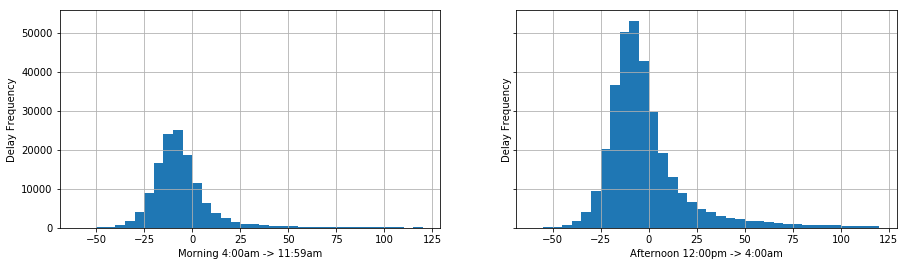

<function __main__.search(Carrier, Airport)>

In [15]:
'''
#------------------------------------------------------------
To Filter by:
Airport Only: choose any airport, and select --NONE-- in the carrier dropdown
Carrier only: choose --NONE-- in the airport, and any Carrier
Airport+ Carrier: select any airport and carrier
Return all flights: select --NONE-- in both  airport and carrier.
#------------------------------------------------------------
''' 



#Read the carriers.csv file into a dataframe
carriers = pd.read_csv("data/carriers.csv")
# index the dataframe, leaving only those carriers that are in the  flights dataframe, 
# so we have their code and description
carriers = carriers[carriers.Code.isin(list(flights.UNIQUE_CARRIER.unique()))]
# add a "NONE" option, so we can avoid filtering by  carrier
carriers.loc[0] = ["0","--NONE--"]
# set the indexing column of the dataframe to be the description and convert it to a dictionary
# using the description as index we can have it as key of the dictionary, that way in the 
#dropdown it will appear as the text in the dropdown and the code will be the value sent to the
#interact function
carriers = carriers.set_index("Description")["Code"].to_dict()
# order the elements so it is easier to locate an specific one
carriers = OrderedDict(sorted(carriers.items()))

#the same for airports
airports = pd.read_csv("data/airports.csv")
airports = airports[airports.Code.isin(list(flights.DEST.unique()))]
airports.loc[0] = ["0","--NONE--"]
airports = airports.set_index("Description")["Code"].to_dict()
airports = OrderedDict(sorted(airports.items()))


def generateTablePlot(df):
    
       
    fig, axs = plt.subplots(1,2,sharey=True)
    # first graph
    df.ARR_DELAY[(df.CRS_ARR_TIME >= 400) & (df.CRS_ARR_TIME < 1200)].hist(bins=36,range=[-60,120],ax=axs[0])

    # second graph 
    df_1 = df.ARR_DELAY[(df.CRS_ARR_TIME >= 1200) & (df.CRS_ARR_TIME < 2400)]
    df_2 = df.ARR_DELAY[(df.CRS_ARR_TIME >= 0) & (df.CRS_ARR_TIME < 400)]
    frames = [df_1,df_2]
    result = pd.concat(frames)
    result.hist(bins=36,range=[-60,120],ax=axs[1])
    
    #added labels and settings to the plot
    axs[0].set_xlabel('Morning 4:00am -> 11:59am')
    axs[0].set_ylabel('Delay Frequency')
    axs[1].set_xlabel('Afternoon 12:00pm -> 4:00am')
    axs[1].set_ylabel('Delay Frequency')
    fig.subplots_adjust(wspace=.20)
    #fig.tight_layout()
    fig.set_figwidth(15)



def search(Carrier,Airport):
    print ("selected Carrier:%s | Selected Airport:%s" % (Carrier,Airport))
    if((Carrier == "0") & (Airport == "0")):
        print ("select all flights")
        generateTablePlot(flights)
    elif((Carrier != "0") & (Airport == "0")):
        print ("select data based on Carrier")
        generateTablePlot(flights[(flights.UNIQUE_CARRIER == Carrier)])
    elif((Carrier == "0") & (Airport != "0")):
        print ("select data based on Airport")
        generateTablePlot(flights[(flights.DEST == Airport)])
    elif((Carrier != "0") & (Airport != "0")):
        print ("select data based on Airport + Carrier")
        generateTablePlot(flights[(flights.DEST == Airport)  & (flights.UNIQUE_CARRIER == Carrier)])

'''
#------------------------------------------------------------
To Filter by:
Airport Only: choose any airport, and select --NONE-- in the carrier dropdown
Carrier only: choose --NONE-- in the airport, and any Carrier
Airport+ Carrier: select any airport and carrier
Return all flights: select --NONE-- in both  airport and carrier.
#------------------------------------------------------------
'''   

interact(search,Carrier=widgets.Dropdown(
    options=carriers,
    value='0',
    description='Carrier:',
    disabled=False,
    button_style=''
),
         Airport=widgets.Dropdown(
    options=OrderedDict(sorted(airports.items())),
    value='0',
    description='Airport:',
    disabled=False,
    button_style=''
))

# THIS ASSIGNMENT IS DUE ON KEATs BY
# SUNDAY 27th NOVEMBER 23:55

### Turn in the following

* Submit your completed Jupyter Notebook ***ONLY*** in the Coursework 2 Submission under **Coursework 2** on KEATs.  There is no need to re-upload the flight data.
* You should not require adding any additional data for this assignment, the grader will use the same data/ that is provided to you to test your code.


### Point Breakdown (Worth 5% of your course grade)

Question | Points
--- | ---
Part 1 Question 1.1 |   5 points
Part 1 Question 1.2 |  10 points
Part 1 Question 1.3 | 5 points
Part 1 Question 1.4 |  10 points
Part 1 Question 1.5 | 10 points
Part 1 Question 1.6 |  5 points
Part 1 Question 1.7 | 10 points
Part 2 | 20 points
Part 3 | 25 points
**Total Number of Points** | 100 points


